## **Lifestyle Forum Search Engine Design**

Group_41_IR_Assignment_3

We propose to develop a prototype of lifestyle forum search engine which employs Bag of Word concepts for indexing, BM25, DFR-BM25, retrieval model, and TFIDF,TF for retrieval ranking along with Precision-R evaluation metrics to provide relevant query results.

# **Loading Data**


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###link to data:
path_to_data = '/content/drive/MyDrive/IR/data.csv'
#path_to_data = 'Cleaned_Amazon.csv'
#https://drive.google.com/file/d/1pJFPa5772JiXWxZ9pGpwNbO6D0BBCEXZ/view?usp=sharing
df = pd.read_csv(path_to_data)

# **Preprocess Data**

In [ ]:
import spacy
from tqdm import tqdm

#df = pd.read_csv('Amazon.csv')
df = df.filter(regex="^(?!review).*")
df = df.rename(columns={'Unnamed: 0': 'Unnamed'})
print(df.columns)



Index(['id,name,brand,categories'], dtype='object')


# Removing special characters

In [ ]:
def spl_chars_removal(lst):
    lst1=list()
    for element in lst:
        str=''
        str = re.sub('[⁰-9a-zA-Z]',' ',element)
        lst1.append(str)
    return lst1

# Removing stop words

In [ ]:
#adding words to stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import STOPWORDS

In [ ]:
!pip install python-terrier

     |████████████████████████████████| 97 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 32.8 MB/s 
     |████████████████████████████████| 69 kB 6.4 MB/s 
     |████████████████████████████████| 297 kB 53.5 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
     |████████████████████████████████| 1.2 MB 41.6 MB/s 
     |████████████████████████████████| 72 kB 1.4 MB/s 
     |████████████████████████████████| 294 kB 45.1 MB/s 
     |████████████████████████████████| 126 kB 51.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 596 kB 51.1 MB/s 
     |████████████████████████████████| 6.4 MB 40.2 MB/s 
     |████████████████████████████████| 287 kB 56.4 MB/s 
     |████████████████████████████████| 59 kB 6.2 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.8.1-py3-none

In [ ]:
import pyterrier as pt
if not pt.started():
  pt.init()

terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.8.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



# **Indexing**

In [ ]:
import random
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
sns.set()

nltk.download('wordnet')
nltk.download('punkt')
nltk.download("stopwords")

stops = set(stopwords.words("english"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def queryExpansion(sentence):
  
  result = []
  # Tokenize
  text = word_tokenize(sentence)
  # remove stopwords
  text = [word for word in text if word not in stops]

  for word in text:
    added = 0
    result.append(word)
    if wn.synsets(word):
      while added < 20:
        len_synsets = len(wn.synsets(word))
        chosen_synset = random.randrange(0, len_synsets, 1)
        len_lemma = len(wn.synsets(word)[chosen_synset].lemmas())
        chosen_lemma = random.randrange(0, len_lemma, 1)
        synonym = wn.synsets(word)[chosen_synset].lemmas()[chosen_lemma].name()
        synonym = ' '.join(synonym.split('_'))

        if synonym != word:
          result.append(synonym)
          added = 20

        added = added + 1

  result = ' '.join(word for word in result)

  return result

# **Data Distribution**

The PyTerrier Indexer by default performs the necessary tokenization, stopword removal, and Porter stemming procedures.

In [ ]:
dataset = pt.datasets.get_dataset('irds:lotte/lifestyle/dev/search')
topics = dataset.get_topics()
qrels = dataset.get_qrels()

[INFO] If you have a local copy of https://downloads.cs.stanford.edu/nlp/data/colbert/colbertv2/lotte.tar.gz, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/3b2e88b1d66933627462950b4c3f5d0f
[INFO] [starting] https://downloads.cs.stanford.edu/nlp/data/colbert/colbertv2/lotte.tar.gz
[INFO] [finished] https://downloads.cs.stanford.edu/nlp/data/colbert/colbertv2/lotte.tar.gz: [11:16] [3.58GB] [5.29MB/s]
[INFO] [starting] extracting from tar file
[INFO] [finished] extracting from tar file [01:37]


In [ ]:
topics

,qid,query
0,0,how much should i feed my 1 year old english m...
1,1,are zebra loaches safe with shrimp
2,2,are serpae tetras fin nippers
3,3,do neon tetras eat shrimp
4,4,how much should i feed my english mastiff
...,...,...
412,412,is there a fuse for airbags
413,413,what last longer manual or automatic transmission
414,414,how much does it cost to replace a scion tc en...
415,415,are both radiator hoses supposed to be hot


In [ ]:
dataset.info_url()

'https://ir-datasets.com/lotte.html#lotte/lifestyle/dev/search'

In [ ]:
indexer = pt.IterDictIndexer('./indices/lotte_lifestyle_dev')
index_ref = indexer.index(dataset.get_corpus_iter(), fields=['text'])

lotte/lifestyle/dev/search documents:   0%|          | 0/268893 [00:00<?, ?it/s]

09:31:59.091 [ForkJoinPool-1-worker-3] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (152318) - further warnings are suppressed
09:32:36.966 [ForkJoinPool-1-worker-3] WARN org.terrier.structures.indexing.Indexer - Indexed 1 empty documents


In [ ]:
index_ref

<org.terrier.querying.IndexRef at 0x7f4de0d3b590 jclass=org/terrier/querying/IndexRef jself=<LocalRef obj=0x55f1bb23ece0 at 0x7f4ddf800cb0>>

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

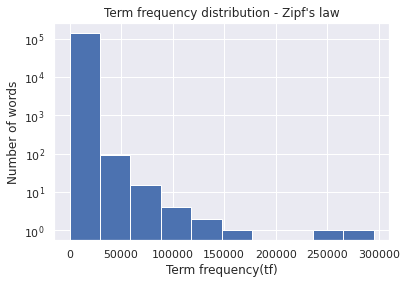

In [ ]:
index_new = pt.IndexFactory.of(index_ref)
tf=defaultdict(list)
index_new.getLexicon()["vir"].getFrequency()
for id in index_new.getLexicon():
  term=id.getKey()
  tf["Terms"].append(id.getKey())
  tf["Frequency"].append(id.getValue().getFrequency())
term_frequency=pd.DataFrame(tf)  
term_frequency.shape
plt.hist(term_frequency["Frequency"],log=True)
plt.xlabel("Term frequency(tf)")
plt.ylabel("Number of words")
plt.title("Term frequency distribution - Zipf's law")
plt.show()

# **Query Parser**

In [ ]:
!pip install plyse

In [ ]:
from plyse import QueryParser, GrammarFactory

parser = QueryParser(GrammarFactory.build_default())
query = parser.parse("best park in the city")

# **Search and Ranking Implementation**
**BM25, DFR_BM25, TF_IDF and TF**

In [ ]:
BM_25 = pt.BatchRetrieve(index_ref, wmodel='BM25')
DFR_BM25_NoExp = pt.BatchRetrieve(index_ref, wmodel='DFR_BM25')
TF_IDF_NoEXP = pt.BatchRetrieve(index_ref, wmodel='TF_IDF')
TF_NoExp = pt.BatchRetrieve(index_ref, wmodel='Tf')
# (optionally other pipeline components)
rank_precision = pt.Experiment(
    [BM_25, DFR_BM25_NoExp, TF_IDF_NoEXP, TF_NoExp],
    topics,
    qrels,
    eval_metrics=["map", "recip_rank"],
    names=['BM25_NoExp', 'DFR_BM25_NoExp', 'TF_IDF_NoExp', 'TF_NoExp']
)

#Evaluation

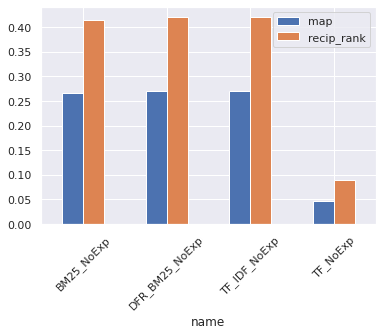

In [ ]:
rank_precision.plot.bar(x='name')
plt.xticks(rotation = 45)
plt.grid(True)

In [ ]:
Relevant_document = pt.Experiment(
    [BM_25, DFR_BM25_NoExp, TF_IDF_NoEXP, TF_NoExp],
    topics,
    qrels,
    eval_metrics=["num_rel_ret"],
    names=['BM25_NoExp', 'DFR_BM25_NoExp', 'TF_IDF_NoExp', 'TF_NoExp']
)

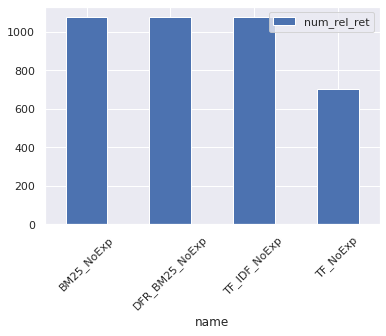

In [ ]:
Relevant_document.plot.bar(x='name')
plt.xticks(rotation = 45)
plt.grid(True)

In [ ]:
precision_at_x = pt.Experiment(
    [BM_25, DFR_BM25_NoExp, TF_IDF_NoEXP, TF_NoExp],
    topics,
    qrels,
    eval_metrics=["P_5", "P_10", "P_15"],
    names=['BM25_NoExp', 'DFR_BM25_NoExp', 'TF_IDF_NoExp', 'TF_NoExp']
)

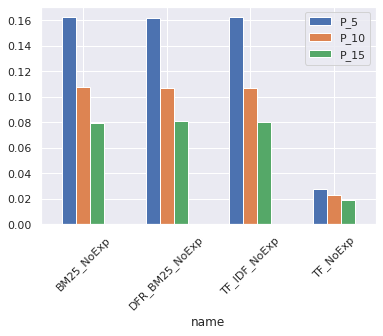

In [ ]:
precision_at_x.plot.bar(x='name')
plt.xticks(rotation = 45)
plt.grid(True)

In [ ]:
recall_at_x = pt.Experiment(
    [BM_25, DFR_BM25_NoExp, TF_IDF_NoEXP, TF_NoExp],
    topics,
    qrels,
    eval_metrics=["recall_5", "recall_10", "recall_15"],
    names=['BM25_NoExp', 'DFR_BM25_NoExp', 'TF_IDF_NoExp', 'TF_NoExp']
)

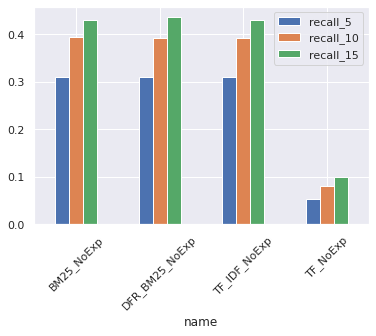

In [ ]:
recall_at_x.plot.bar(x='name')
plt.xticks(rotation = 45)
plt.grid(True)

In [ ]:
cumulative_gain = pt.Experiment(
    [BM_25, DFR_BM25_NoExp, TF_IDF_NoEXP, TF_NoExp],
    topics,
    qrels,
    eval_metrics=["ndcg"],
    names=['BM25_NoExp', 'DFR_BM25_NoExp', 'TF_IDF_NoExp', 'TF_NoExp']
)

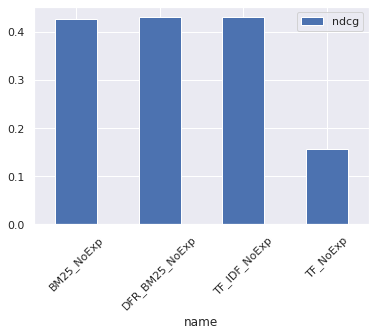

In [ ]:
cumulative_gain.plot.bar(x='name')
plt.xticks(rotation = 45)
plt.grid(True)

# **Results**

In [ ]:
BM_25.search('best park in the city')

,qid,docid,docno,rank,score,query
0,1,264258,264258,0,22.974159,best park in the city
1,1,73017,73017,1,21.640765,best park in the city
2,1,217979,217979,2,21.202923,best park in the city
3,1,222662,222662,3,20.099984,best park in the city
4,1,55339,55339,4,19.803737,best park in the city
...,...,...,...,...,...,...
995,1,236958,236958,995,9.322850,best park in the city
996,1,64652,64652,996,9.312191,best park in the city
997,1,225101,225101,997,9.312191,best park in the city
998,1,229659,229659,998,9.308444,best park in the city


In [ ]:
DFR_BM25_NoExp.search('best park in the city')

,qid,docid,docno,rank,score,query
0,1,264258,264258,0,10.409366,best park in the city
1,1,73017,73017,1,9.990389,best park in the city
2,1,217979,217979,2,9.704005,best park in the city
3,1,222662,222662,3,9.112209,best park in the city
4,1,55339,55339,4,8.991700,best park in the city
...,...,...,...,...,...,...
995,1,215590,215590,995,4.250339,best park in the city
996,1,241754,241754,996,4.250339,best park in the city
997,1,69360,69360,997,4.245698,best park in the city
998,1,93447,93447,998,4.245698,best park in the city


In [ ]:
TF_IDF_NoEXP.search('best park in the city')

,qid,docid,docno,rank,score,query
0,1,264258,264258,0,12.766094,best park in the city
1,1,73017,73017,1,11.864821,best park in the city
2,1,217979,217979,2,11.735416,best park in the city
3,1,222662,222662,3,11.180280,best park in the city
4,1,55339,55339,4,10.855647,best park in the city
...,...,...,...,...,...,...
995,1,243295,243295,995,5.139460,best park in the city
996,1,262038,262038,996,5.137427,best park in the city
997,1,266280,266280,997,5.137427,best park in the city
998,1,62283,62283,998,5.136300,best park in the city


In [ ]:
TF_NoExp.search('best park in the city')

,qid,docid,docno,rank,score,query
0,1,67582,67582,0,163.0,best park in the city
1,1,67586,67586,1,63.0,best park in the city
2,1,72187,72187,2,35.0,best park in the city
3,1,189126,189126,3,27.0,best park in the city
4,1,70154,70154,4,25.0,best park in the city
...,...,...,...,...,...,...
995,1,56360,56360,995,3.0,best park in the city
996,1,56364,56364,996,3.0,best park in the city
997,1,56395,56395,997,3.0,best park in the city
998,1,56521,56521,998,3.0,best park in the city
